<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP7/TP7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 7: Reducción de Dimensionalidad

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar algoritmos de aprendizaje automático supervisado que permita encontrar la influencia de cada variable en el costo de una vivienda.
## Objetivos Específicos
*   Desarrollar un modelo de regresión lineal que prediga el precio de venta de un inmueble a partir de las variables del dataset.
*   Verificar los modelos de regresión lineal y no lineal a diferentes parámetros
*   Visualizar los resultados para distintos métodos de regresión no lineal

###¿Qué son los algoritmos de regresión?
El análisis de regresión es un subcampo del aprendizaje automático supervisado cuyo objetivo es establecer un método para la relación entre un cierto número de características y una variable objetivo continua.

###Problema
El presente trabajo práctico da solución al siguiente ejercicio:

El dataset de viviendas de Boston contiene 506 observaciones y 14 variables. El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston y poder predecir los precios a partir de los atributos.
A continuación se describen los atributos:

*   CRIM - tasa de criminalidad per cápita por ciudad
*   ZN - proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
*   INDUS - proporción de acres comerciales no minoristas por ciudad.
*   CHAS: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
*   NOX - concentración de óxidos nítricos (partes por 10 millones)
*   RM - número promedio de cuartos por vivienda
*   AGE - proporción de unidades ocupadas por propietarios construidas antes de 1940
*   DIS: distancias ponderadas a cinco centros de empleo de Boston
*   RAD - índice de accesibilidad a las carreteras radiales
*   TAX - tasa de impuestos sobre la propiedad de valor total por cada 10,000(dólares)
*   PTRATIO - ratio alumno-profesor por localidad
*   B - 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
*   LSTAT - % estado más bajo de la población
*   MEDV: valor medio de las viviendas ocupadas por sus propietarios en $1000

In [1]:
#Lectura de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###1. Tratamiento de los datos

In [2]:
#Lectura de datos
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.00,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.20,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.50,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.00,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.70,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871896,147,Stone Brewing Co.,1285613705,4.0,4.0,4.5,CHILLINDYLAN,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871897,147,Stone Brewing Co.,1285125252,4.5,4.0,4.5,drabmuh,American Barleywine,4.0,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871898,147,Stone Brewing Co.,1284682404,4.5,4.5,4.5,tavernjef,American Barleywine,4.0,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871899,147,Stone Brewing Co.,1030630588,4.0,4.0,3.5,uglyguy,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2002,9.91,3678


In [3]:
#Visualización de los atributos
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [4]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

brewery_id                0
brewery_name              9
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      181
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              36242
beer_beerid               0
dtype: int64

In [5]:
#Permite obtener los estadísticos descriptivos
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,871901.000000,8.719010e+05,871901.000000,871901.000000,871901.000000,871901.000000,871901.000000,835659.000000,871901.000000
mean,3271.796264,1.227348e+09,3.828825,3.755972,3.856491,3.757737,3.808603,7.046130,23337.928449
std,5644.054301,7.531277e+07,0.704718,0.677216,0.597753,0.662392,0.711305,2.330143,22030.109041
min,1.000000,8.406720e+08,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000
25%,140.000000,1.179688e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.300000,2151.000000
50%,590.000000,1.243041e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,17770.000000
75%,2743.000000,1.289962e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,41722.000000
max,28003.000000,1.326285e+09,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77314.000000


In [6]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871901 entries, 0 to 871900
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          871901 non-null  int64  
 1   brewery_name        871892 non-null  object 
 2   review_time         871901 non-null  int64  
 3   review_overall      871901 non-null  float64
 4   review_aroma        871901 non-null  float64
 5   review_appearance   871901 non-null  float64
 6   review_profilename  871720 non-null  object 
 7   beer_style          871901 non-null  object 
 8   review_palate       871901 non-null  float64
 9   review_taste        871901 non-null  float64
 10  beer_name           871901 non-null  object 
 11  beer_abv            835659 non-null  float64
 12  beer_beerid         871901 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 86.5+ MB


###Eliminación de valores nulos
La función pandas. DataFrame. dropna() elimina los valores nulos del DataFrame dejando caer las filas o columnas que contienen los valores nulos.

In [7]:
# Drop null row values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835471 entries, 0 to 871900
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          835471 non-null  int64  
 1   brewery_name        835471 non-null  object 
 2   review_time         835471 non-null  int64  
 3   review_overall      835471 non-null  float64
 4   review_aroma        835471 non-null  float64
 5   review_appearance   835471 non-null  float64
 6   review_profilename  835471 non-null  object 
 7   beer_style          835471 non-null  object 
 8   review_palate       835471 non-null  float64
 9   review_taste        835471 non-null  float64
 10  beer_name           835471 non-null  object 
 11  beer_abv            835471 non-null  float64
 12  beer_beerid         835471 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 89.2+ MB


In [8]:
print(df.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


###Debemos preguntarnos, ¿es posible que un usuario califico la misma cerveza más de una vez?


In [9]:
# Ordenamos el atributo 'review_overall'
df = df.sort_values('review_overall', ascending=False)

# keep='first' mantiene la calificación más alta del usuario y elimina el resto
df = df.drop_duplicates(subset= ['review_profilename','beer_name'], keep='first')
df.info()

# Imprime el porcentaje de datos duplicados
print("Porcentaje de valores duplicados:", round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824468 entries, 136263 to 39648
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          824468 non-null  int64  
 1   brewery_name        824468 non-null  object 
 2   review_time         824468 non-null  int64  
 3   review_overall      824468 non-null  float64
 4   review_aroma        824468 non-null  float64
 5   review_appearance   824468 non-null  float64
 6   review_profilename  824468 non-null  object 
 7   beer_style          824468 non-null  object 
 8   review_palate       824468 non-null  float64
 9   review_taste        824468 non-null  float64
 10  beer_name           824468 non-null  object 
 11  beer_abv            824468 non-null  float64
 12  beer_beerid         824468 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 88.1+ MB
Porcentaje de valores duplicados: 1.46 %


Observamos un 1.46% de valores duplicados, dando a conocer que hubo usuarios que calificaron la misma cerveza varias ocasiones.

Es importante conocer si existe algún tipo de asociación entre atributos, corr() describe la correlación entre atributos de la dataframe

In [10]:
df.corr()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.000000,0.245652,-0.003749,0.034198,0.009777,0.007349,0.005494,0.077822,0.460838
review_time,0.245652,1.000000,0.025822,0.067343,0.056340,0.056916,0.043845,0.159444,0.474940
review_overall,-0.003749,0.025822,1.000000,0.595280,0.475798,0.686437,0.779704,0.111802,0.007011
review_aroma,0.034198,0.067343,0.595280,1.000000,0.532570,0.590504,0.697554,0.312657,0.089894
review_appearance,0.009777,0.056340,0.475798,0.532570,1.000000,0.539759,0.517960,0.237579,0.066183
review_palate,0.007349,0.056916,0.686437,0.590504,0.539759,1.000000,0.715339,0.258309,0.057766
review_taste,0.005494,0.043845,0.779704,0.697554,0.517960,0.715339,1.000000,0.265377,0.042048
beer_abv,0.077822,0.159444,0.111802,0.312657,0.237579,0.258309,0.265377,1.000000,0.246182
beer_beerid,0.460838,0.474940,0.007011,0.089894,0.066183,0.057766,0.042048,0.246182,1.000000


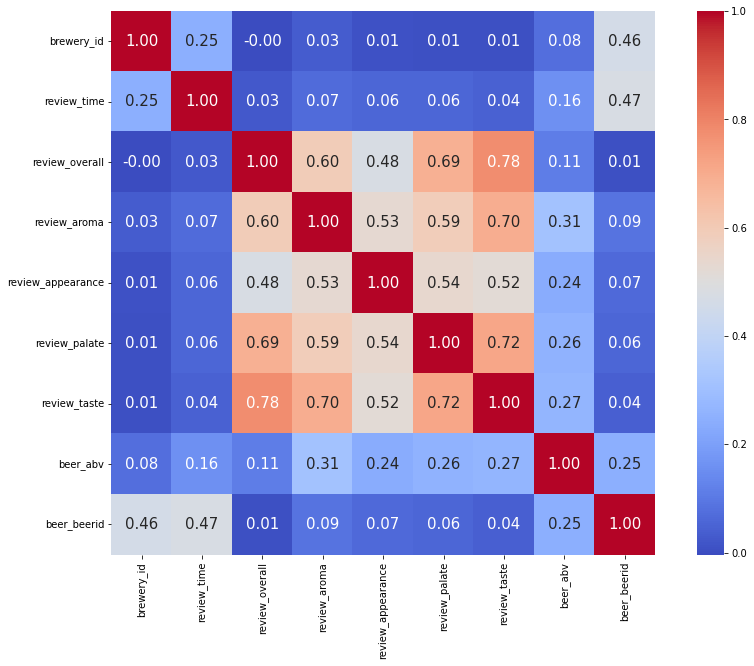

In [11]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Para una mejor interpretación se visualiza la correlación entre atributos, dando como resultado que no existen columnas con multicolinealidad

###Visualiazión de histogramas y densidad para cada variable

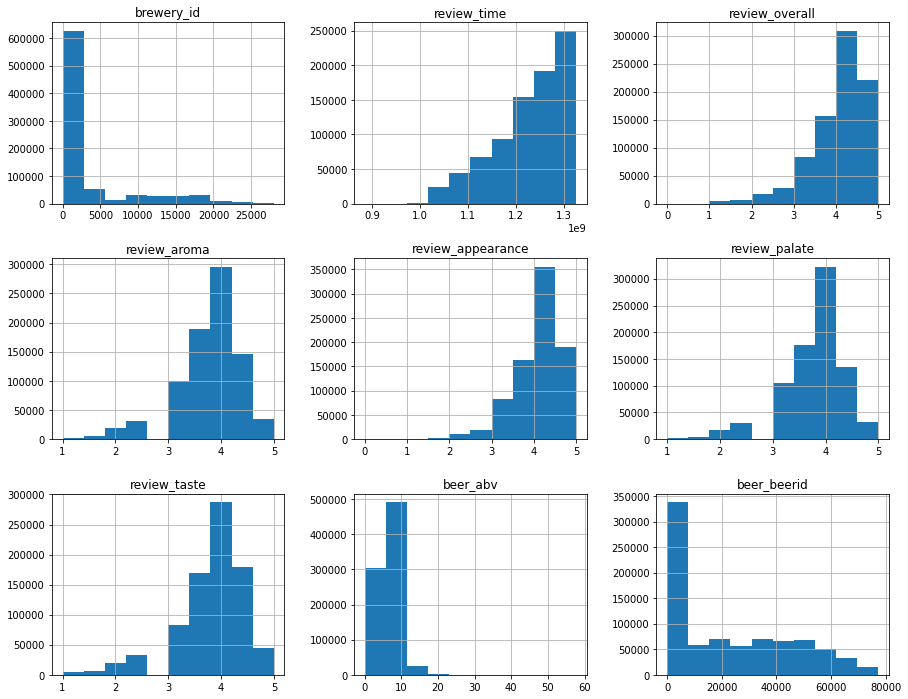

In [17]:
df.hist(figsize=(15,12))
plt.show()